In [50]:
# load libraries and scripts
using GLM
using DataFrames
using Statistics
using Plots.PlotMeasures

include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/disturbances.jl")
include("../scripts/plotting_julian.jl")
include("../scripts/ps_analysis.jl");

In [21]:
#load borders
border, scale_factor = import_border("../data/borders/border.json")
dm = load_discrete_model("../data/disc/pantagruel.h5", scale_factor)
dx = 0.005
grid = get_grid(border, dx);

In [22]:
#scatter(grid.coord[grid.isgrid,2],grid.coord[grid.isgrid,1])
#scatter!(grid.coord[grid.isborder,2],grid.coord[grid.isborder,1])

In [23]:
## Sweep paramters and calculate r^2 between th_discrete and th_continuos
tmin = 1e-7
tmax = 1e-5
step = 2e-7
Nstep = Int64(floor((tmax-tmin)/step)+1)
vals = zeros(Nstep, 2)
i = 1
for j=tmin:step:tmax
    println(j)
    contmod = get_params(grid, scale_factor, "../data/disc/pantagruel.h5", Niter=10,
        dmax = 2*dx, patch=1900.0, bmin=56.0, tau=j);
    compute_stable_sol!(contmod, interval = 10000, Niter = 60000, tol = 1e-7);
    th_disc = get_discrete_values(contmod.coord[contmod.isgrid,:], dm.coord, contmod.th[contmod.isgrid]);
    # df = DataFrame(A=dm.th, B=th_disc)
    # lin = lm(@formula(A  ~ B), df)
    # println(coef(lin))
    # println(r2(lin))
    vals[i,1] = j
    vals[i,2] = 1 - sum((dm.th .- th_disc).^2)/sum((th_disc .- mean(th_disc)).^2)
    i += 1
end

1.0e-7
  2.506845 seconds (529.92 k allocations: 16.811 GiB, 8.64% gc time)
  1.779826 seconds (3.87 k allocations: 1.011 GiB, 22.26% gc time)
[10000.0 0.00020244315701489768]
[20000.0 8.557397621289375e-5]
[30000.0 5.1282177065070655e-5]
[40000.0 4.377681068079564e-5]
[50000.0 3.9136819024787606e-5]
[60000.0 3.621404603260103e-5]
  8.975300 seconds (541.38 k allocations: 19.603 GiB, 4.90% gc time)
3.0e-7
  2.516179 seconds (529.93 k allocations: 16.811 GiB, 9.30% gc time)
  1.380540 seconds (3.87 k allocations: 1.011 GiB, 1.32% gc time)
[10000.0 0.00013406698016427132]
[20000.0 5.310722924134481e-5]
[30000.0 3.0036787843523705e-5]
[40000.0 2.5101086182033328e-5]
[50000.0 2.204171862729698e-5]
[60000.0 2.0130160250264595e-5]
  9.047602 seconds (541.38 k allocations: 19.603 GiB, 4.59% gc time)
5.0e-7
  2.518458 seconds (529.91 k allocations: 16.811 GiB, 8.42% gc time)
  1.377418 seconds (3.87 k allocations: 1.011 GiB, 1.68% gc time)
[10000.0 9.730348872372119e-5]
[20000.0 3.563976581189

[40000.0 4.887308856504902e-6]
[50000.0 3.2302321659738453e-6]
[60000.0 2.2998213260461142e-6]
  9.888007 seconds (541.38 k allocations: 19.603 GiB, 2.90% gc time)
4.3e-6
  2.445776 seconds (529.92 k allocations: 16.811 GiB, 7.69% gc time)
  1.716496 seconds (3.87 k allocations: 1.011 GiB, 0.89% gc time)
[10000.0 6.87576456230854e-5]
[20000.0 2.167145803255721e-5]
[30000.0 8.062972639166777e-6]
[40000.0 4.865611310744811e-6]
[50000.0 3.23320358075474e-6]
[60000.0 2.306294125675734e-6]
  9.361944 seconds (541.38 k allocations: 19.603 GiB, 6.17% gc time)
4.5e-6
  2.459416 seconds (529.91 k allocations: 16.811 GiB, 6.78% gc time)
  1.502081 seconds (3.87 k allocations: 1.011 GiB, 0.87% gc time)
[10000.0 6.871310686684673e-5]
[20000.0 2.1668312565559233e-5]
[30000.0 8.036327900640128e-6]
[40000.0 4.846306309702619e-6]
[50000.0 3.2379943649685217e-6]
[60000.0 2.310128943472378e-6]
  9.937820 seconds (541.38 k allocations: 19.603 GiB, 2.58% gc time)
4.7e-6
  2.399362 seconds (529.92 k alloca

  1.471714 seconds (3.87 k allocations: 1.011 GiB, 1.25% gc time)
[10000.0 6.670645358419769e-5]
[20000.0 2.0963626499392873e-5]
[30000.0 7.751884651130414e-6]
[40000.0 4.7102140928734215e-6]
[50000.0 3.1334720259623694e-6]
[60000.0 2.183384333109828e-6]
  9.165554 seconds (541.38 k allocations: 19.603 GiB, 2.31% gc time)
8.5e-6
  2.349464 seconds (529.92 k allocations: 16.811 GiB, 7.09% gc time)
  1.341465 seconds (3.87 k allocations: 1.011 GiB, 1.75% gc time)
[10000.0 6.660849979756023e-5]
[20000.0 2.0925298023222183e-5]
[30000.0 7.745330203923206e-6]
[40000.0 4.709780819012188e-6]
[50000.0 3.1262774515816716e-6]
[60000.0 2.175021122319265e-6]
  9.038845 seconds (541.38 k allocations: 19.603 GiB, 1.94% gc time)
8.7e-6
  2.539710 seconds (529.93 k allocations: 16.811 GiB, 8.57% gc time)
  1.417836 seconds (3.87 k allocations: 1.011 GiB, 1.44% gc time)
[10000.0 6.65093063231259e-5]
[20000.0 2.0887249444712097e-5]
[30000.0 7.734969770911704e-6]
[40000.0 4.706251439445808e-6]
[50000.0 3.

In [24]:
## Sweep paramters and calculate r^2 between th_discrete and th_continuos
tmin = 0.0
tmax = 100.0
step = 2.0
Nstep = Int64(floor((tmax-tmin)/step)+1)
vals = zeros(Nstep, 2)
i = 1
for j=tmin:step:tmax
    println(j)
    contmod = get_params(grid, scale_factor, "../data/disc/pantagruel.h5", Niter=10,
        dmax = 2*dx, patch=1900.0, bmin=j, tau=5e-7);
    compute_stable_sol!(contmod, interval = 10000, Niter = 120000, tol = 1e-7);
    th_disc = get_discrete_values(contmod.coord[contmod.isgrid,:], dm.coord, contmod.th[contmod.isgrid]);
    # df = DataFrame(A=dm.th, B=th_disc)
    # lin = lm(@formula(B  ~ A), df)
    # println(coef(lin))
    # println(r2(lin))
    vals[i,1] = j
    vals[i,2] = 1 - sum((dm.th .- th_disc).^2)/sum((th_disc .- mean(th_disc)).^2)
    i += 1
end

0.0
  2.113353 seconds (529.91 k allocations: 16.811 GiB, 6.88% gc time)
  0.926891 seconds (3.87 k allocations: 1.011 GiB, 2.09% gc time)
[10000.0 0.0003919849737243908]
[20000.0 0.0001389202336490314]
[30000.0 9.543718376470167e-5]
[40000.0 6.850222988763477e-5]
[50000.0 5.200969896979046e-5]
[60000.0 4.1693696716471607e-5]
[70000.0 3.508614487657269e-5]
[80000.0 3.075926470597068e-5]
[90000.0 2.7870834469645445e-5]
[100000.0 2.5911678579682018e-5]
[110000.0 2.456582238785643e-5]
[120000.0 2.3632117059690927e-5]
 13.280517 seconds (1.08 M allocations: 39.206 GiB, 4.38% gc time)
2.0
  2.057306 seconds (529.91 k allocations: 16.811 GiB, 6.34% gc time)
  0.882514 seconds (3.87 k allocations: 1.011 GiB, 1.91% gc time)
[10000.0 0.00037325298423729336]
[20000.0 0.00012486769750985616]
[30000.0 7.936483156001373e-5]
[40000.0 5.748139385897133e-5]
[50000.0 4.4495801458488415e-5]
[60000.0 3.653512768586609e-5]
[70000.0 3.149320103457143e-5]
[80000.0 2.820862514063549e-5]
[90000.0 2.6020004454

28.0
  2.015771 seconds (529.91 k allocations: 16.811 GiB, 4.79% gc time)
  1.003957 seconds (3.87 k allocations: 1.011 GiB, 3.68% gc time)
[10000.0 0.00017195540370829043]
[20000.0 5.873725181304579e-5]
[30000.0 3.157161829037136e-5]
[40000.0 2.5071692781430954e-5]
[50000.0 2.1021436330537213e-5]
[60000.0 1.8493413964426608e-5]
[70000.0 1.6902258541229287e-5]
[80000.0 1.5892540988993176e-5]
[90000.0 1.5247684116204141e-5]
[100000.0 1.4833978814188242e-5]
[110000.0 1.4567762709027932e-5]
[120000.0 1.4396118480197728e-5]
 14.499926 seconds (1.08 M allocations: 39.206 GiB, 2.17% gc time)
30.0
  1.952642 seconds (529.91 k allocations: 16.811 GiB, 3.83% gc time)
  1.041858 seconds (3.87 k allocations: 1.011 GiB, 4.20% gc time)
[10000.0 0.00016377391615285397]
[20000.0 5.6380490649488024e-5]
[30000.0 3.0191689395886456e-5]
[40000.0 2.401644590510621e-5]
[50000.0 2.016618343980703e-5]
[60000.0 1.7764972957134972e-5]
[70000.0 1.6256028117833665e-5]
[80000.0 1.5300410559193622e-5]
[90000.0 1.4

LoadError: InterruptException:

In [16]:
## Sweep paramters and calculate r^2 between th_discrete and th_continuos
tmin = 1800.0
tmax = 2200.0
step = 20.0
Nstep = Int64(floor((tmax-tmin)/step)+1)
vals = zeros(Nstep, 2)
i = 1
for j=tmin:step:tmax
    println(j)
    contmod = get_params(grid, scale_factor, "../data/disc/pantagruel.h5", Niter=10,
        dmax = 2*dx, patch=j, bmin=56.0, tau=1e-8);
    compute_stable_sol!(contmod, interval = 10000, Niter = 60000, tol = 1e-7);
    th_disc = get_discrete_values(contmod.coord[contmod.isgrid,:], dm.coord, contmod.th[contmod.isgrid]);
    # df = DataFrame(A=dm.th, B=th_disc)
    # lin = lm(@formula(B  ~ A), df)
    # println(coef(lin))
    # println(r2(lin))
    vals[i,1] = j
    vals[i,2] = 1 - sum((dm.th .- th_disc).^2)/sum((th_disc .- mean(th_disc)).^2)
    i += 1
end

1800.0
  2.649861 seconds (529.91 k allocations: 16.811 GiB, 8.58% gc time)
  1.648745 seconds (3.87 k allocations: 1.011 GiB, 1.05% gc time)
[10000.0 0.000250374245231999]
[20000.0 0.00010871149194247032]
[30000.0 6.67451771392269e-5]
[40000.0 5.734283413916241e-5]
[50000.0 5.152290947774141e-5]
[60000.0 4.78416146461047e-5]
  9.217359 seconds (541.38 k allocations: 19.603 GiB, 4.39% gc time)


LoadError: UndefVarError: dm not defined

In [17]:
## Sweep paramters and calculate r^2 between th_discrete and th_continuos
tmin = 5
tmax = 100
step = 2
Nstep = Int64(floor((tmax-tmin)/step)+1)
vals = zeros(Nstep, 2)
i = 1
for j=tmin:step:tmax
    println(j)
    contmod = get_params(grid, scale_factor, "../data/disc/pantagruel.h5", Niter=j,
        dmax = 2*dx, patch=1900.0, bmin=56.0, tau=5e-7);
    compute_stable_sol!(contmod, interval = 10000, Niter = 60000, tol = 1e-7);
    th_disc = get_discrete_values(contmod.coord[contmod.isgrid,:], dm.coord, contmod.th[contmod.isgrid]);
    # df = DataFrame(A=dm.th, B=th_disc)
    # lin = lm(@formula(A  ~ B), df)
    # println(coef(lin))
    # println(r2(lin))
    vals[i,1] = j
    vals[i,2] = 1 - sum((dm.th .- th_disc).^2)/sum((th_disc .- mean(th_disc)).^2)
    i += 1
end

5
  2.612899 seconds (529.91 k allocations: 16.811 GiB, 9.16% gc time)
  0.712531 seconds (2.40 k allocations: 581.564 MiB, 1.64% gc time)
[10000.0 0.00014735409488908502]
[20000.0 5.941558105404532e-5]
[30000.0 3.413185624367987e-5]
[40000.0 2.871281899408107e-5]
[50000.0 2.535689715343903e-5]
[60000.0 2.3255763325624734e-5]
  9.509910 seconds (541.38 k allocations: 19.603 GiB, 4.47% gc time)


LoadError: UndefVarError: dm not defined

In [18]:
vals[argmax(vals[:,2])]

0.0

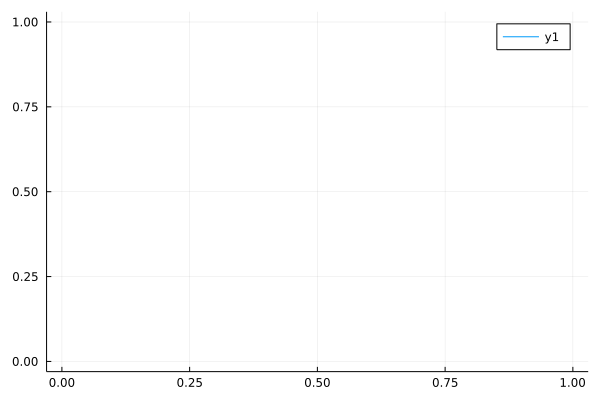

In [19]:
plot(vals[:,1], vals[:,2])

In [25]:
# compute or load grid parameters
contmod = get_params(grid, scale_factor, "../data/disc/pantagruel.h5", Niter=10,
    dmax = 2*dx, patch=1900.0, bmin=52.0, tau=5.0e-7);

  2.264656 seconds (529.81 k allocations: 16.811 GiB, 6.09% gc time)
  1.048785 seconds (3.87 k allocations: 1.011 GiB, 1.52% gc time)


[10000.0 0.00010416045883054892]
[20000.0 3.7917249033014855e-5]
[30000.0 1.996525850811448e-5]
[40000.0 1.606390939346003e-5]
[50000.0 1.3632095115512222e-5]
[60000.0 1.2123369674488238e-5]
  6.224758 seconds (541.27 k allocations: 19.603 GiB, 2.56% gc time)
2.844553319021642


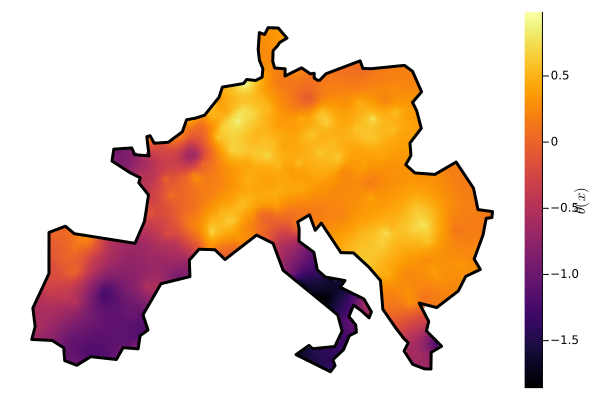

In [51]:
compute_stable_sol!(contmod, interval = 10000, Niter = 60000, tol = 1e-7);
println(maximum(contmod.th) - minimum(contmod.th))
hm_plot(contmod, contmod.th, cb_title = "\$\\theta(x)\$", borders=[border])
#plot!(colorbar = :bottom)
#current()

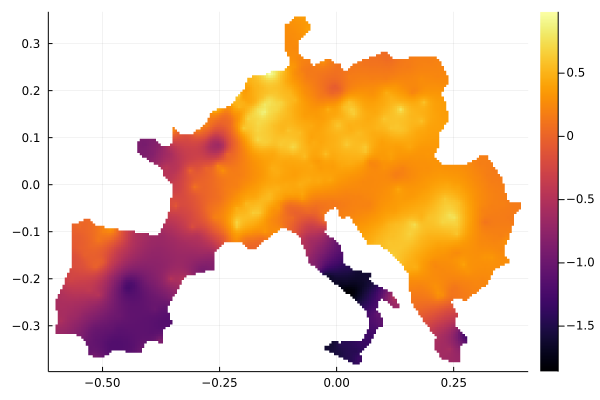

In [56]:
temp = copy(contmod.th)
temp[.!contmod.isinside] .= NaN
Plots.heatmap(contmod.yrange, contmod.xrange,
        reshape(temp, contmod.Ny, contmod.Nx), colorbar=:bottom,colorbar_scale=:ln)

[-0.06169145754130874, 0.9818947488458708]
0.8444578839145519


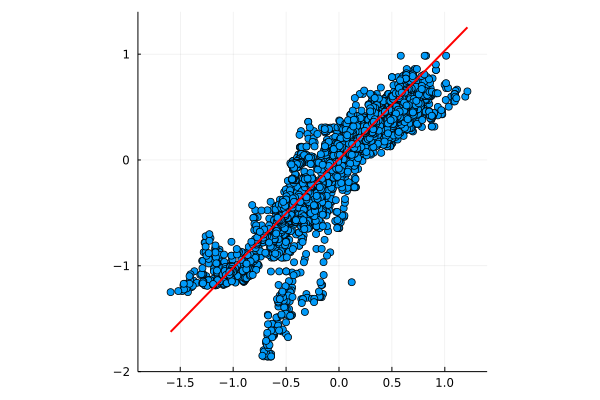

In [44]:
th_disc = get_discrete_values(contmod.coord[contmod.isgrid,:], dm.coord, contmod.th[contmod.isgrid]);
df = DataFrame(A=dm.th, B=th_disc)
lin = lm(@formula(B  ~ A), df)
println(coef(lin))
println(r2(lin))
b=coef(lin)[1]
m=coef(lin)[2]
scatter(dm.th, th_disc)
plot!([minimum(dm.th);maximum(dm.th)],[b+m*minimum(dm.th);-b+m*maximum(dm.th)],
    color=:red,linewidth=2,aspect_ratio=:equal, xlim=(-1.9,1.4), ylim=(-2.0,1.4),
    legend=false)
savefig("../numerics/steady_1.svg")

In [28]:
r = 1 - sum((dm.th .- th_disc).^2)/sum((th_disc .- mean(th_disc)).^2)

0.833018207421808

In [ ]:
#dm = load_discrete_model("../data/disc/pantagruel.h5", scale_factor)
#th = set_ref_phase!(contmod, vec(dm.coord[1,:]), th_ref = 0.0)
th_disc = get_discrete_values(contmod.coord[contmod.isgrid,:], dm.coord, contmod.th[contmod.isgrid]);

In [ ]:
scatter(dm.th, th_disc)
th_min = minimum(dm.th)
th_max = maximum(dm.th)
plot!([th_min; th_max], [th_min; th_max], xlabel="\$\\theta_i^{\\rm ref}\$",
    ylabel="\$\\theta_i\$",color=:red, lw = 2, legend=false, size=(400,400))
# savefig("../numerics/theta_ref_vs_cont.pdf")

In [ ]:
clim = extrema([dm.th; th_disc])
p1 = disc_plot(dm.coord, dm.th, borders=[border], clim=clim, c=:viridis, cbar=false, cb_title="\$\\theta_i\$")
p2 = hm_plot(contmod, contmod.th, cbar=false, borders=[border], c=:viridis, clim=clim)
p3 = scatter([0],[0],zcolor=[NaN],clim=clim, c=:viridis, xlims=(1,1.1), framestyle=:none, label="",
cbar_title="\$\\theta\$")
l = @layout [a b c{0.035w}]
p_all = plot(p1, p2,  p3, layout=l, link=:all, title=["Discrete" "Continuous" ""], size=(1200,400))
savefig("../numerics/discontth0.pdf")

In [ ]:
p1 = scatter(dm.th, th_disc)
th_min = minimum(dm.th)
th_max = maximum(dm.th)
plot!([th_min; th_max], [th_min; th_max], xlabel="\$\\theta_i^{\\rm ref}\$",
    ylabel="\$\\theta_i\$",color=:red, lw = 2, legend=false, left_margin=5mm, bottom_margin=8mm)
p2 = disc_plot(dm.coord, dm.th .- th_disc, borders=[border], c=:viridis, cb_title="\$\\theta_{i}^{\\rm ref}-\\theta_i\$")
l = @layout [a{0.4w} b]
plot(p1, p2, layout=l, size=(1200,400))
savefig("../numerics/comparison.pdf")

In [ ]:
add_local_disturbance!(contmod, [741.57038805;-1078.62366301]/scale_factor, -9.0, 0.01, dx);

In [ ]:
ts, thetas, omegas = perform_dyn_sim(contmod, interval=1,
    Ndt=5000, dt=0.01, method="crank-nicolson");

In [ ]:
#hm_movie(contmod, ts, omegas, tstart = 0.0, tend = 20.0, interval = 1)
c = [500 -250; 0.0 0.0; -500 500; 500. 500.; -1500.0 -1000.0; 750.0 -1000; -1000 -400] / scale_factor
time_plot(contmod, ts, omegas, c, borders = [border], tstart = 0.0, tend = 25.0)